In [27]:
import numpy as np
import scipy.constants as cc

from tabulate import tabulate

import matplotlib.pyplot as plt
from matplotlib import ticker

from RashbaJunction import RashbaJunction2
from RashbaJunction.utilities import *
from RashbaJunction.ScatteringMatrix import ScatteringMatrix

ev_to_j = 1.602176634e-19

hbar = 6.582119569e-16
m = 0.015*cc.m_e
h_xy = 0.1e-3*ev_to_j# mJ

# k_z = np.sqrt(2*m*h_xy/ev_to_j)/hbar
k_z = np.sqrt(2*m*h_xy)/cc.hbar# 1/Metr


x = 500e-9# Metr
x_prime =  k_z*x# adimensional
print(f"k_so {k_z}")
print(f"x' {x_prime}")

BASE_PATH = "plots/tesi/3_Transport_poroperties_RNW/py/"
BASE_PATH_DIRAC_PARADOX = "plots/tesi/4_Dirac_paradox/"
# BASE_PATH_SLIDE = "plots/tesi/Slide/"
BASE_PATH_SLIDE = "/Users/l/Google Drive/polito_/tesi/Text/vesions/Slide/assets/"
print(BASE_PATH)
print(BASE_PATH_DIRAC_PARADOX)
print(BASE_PATH_SLIDE)

k_so 6274572.777578376
x' 3.137286388789188
plots/tesi/3_Transport_poroperties_RNW/py/
plots/tesi/4_Dirac_paradox/
/Users/l/Google Drive/polito_/tesi/Text/vesions/Slide/assets/


In [28]:
def renormallize_result(res, dy = 10):
#     x_int = x
#     res_int = res
    for v in res.values():
        for i in v:
            pos = np.where(np.abs(np.diff(i)) >= dy)[0]
            if len(pos) != 0:
                i[pos] = np.nan
            pos = 0


def adjuct_Tick(axs, **kwarg):
    
    if len(axs.shape) == 1:
        ax = axs.reshape(axs.shape[0], 1)
        for k in kwarg.keys():
            if k != "size":
                kwarg[k] = kwarg[k].reshape(axs.shape[0], 1)
    else:
        ax = axs
    
    for i in range(ax.shape[0]):
        for j in range(ax.shape[1]):
                ax[i, j].tick_params(axis='x', labelsize=kwarg["size"])
                ax[i, j].tick_params(axis='y', labelsize=kwarg["size"])
    
                ax[i, j].xaxis.set_major_locator(ticker.MultipleLocator(kwarg["x_magior"][i, j]))
                ax[i, j].xaxis.set_minor_locator(ticker.MultipleLocator(kwarg["x_minor"][i, j]))

                ax[i, j].xaxis.set_ticks_position('both')
    
                ax[i, j].yaxis.set_major_locator(ticker.MultipleLocator(kwarg["y_magior"][i, j]))
                ax[i, j].yaxis.set_minor_locator(ticker.MultipleLocator(kwarg["y_minor"][i, j]))

                ax[i, j].yaxis.set_ticks_position('both')
    
                ax[i, j].tick_params(which='major', width=1.00, length=5)
                ax[i, j].tick_params(which='minor', width=0.75, length=2.5, labelsize=15)
            
def expansion(x):
    # r = eso/h
    return x**2/(1 + (x/2)**2)**2
#     return 1/(1+4*(r)**2) + np.sqrt(1/r)*x + (r)*x**2

def expansion2(x):
    # r = eso/h
    return 16*np.pi**2*x/E_l/(4 + np.pi**2*x/E_l)**2
#     return 1/(1+4*(r)**2) + np.sqrt(1/r)*x + (r)*x**2

# Plot set up

In [29]:
font = {'family': "Times New Roman", "size": 25}

# y_label = [r"$$\frac{2 \pi \hbar}{q^2} G$$", r"$$-\frac{6 \hbar}{q \pi k_b^2 T}L$$"]
# y_label = [r"$$ \frac{G}{G_0}$$", r"$$-\frac{6 \hbar}{q \pi k_b^2 T}L$$"]
# x_label = r"$$\frac{E}{E_Z}$$"
y_label = [r"$$ G [e^2/h]$$", r"$$T_0$$"]
x_label = [r"$E_F / E_Z$", "$E_F / E_{SO, L}$", "$E_F / E_{SO}$", "$k_{SO, L}\, d$"]

y_label_pos = [(-.02, 1.03), (-.09, 1)]

legend_font_size = 25

region_lbl = ["(a)", "(b)", "(c)"]

# Single interface case



## Figure 1

### T vs E at constant $E_Z$ and $E_{so,R} = E_Z/4$ with parameters $2E_{so,L}/E_Z=0.2, 0.7, 3$

In [6]:
alp_r = 1/4-1E-4
Eso_profile = [-1, alp_r]
x_profile = [0]

junction = RashbaJunction([x_profile, Eso_profile])

# trasmission_coeff = {}
# trasmission_coeff_deriv = {}
    
def g(x, par):
#     junction[1] = -par
    if x < -1 and np.abs(par) < 0.5 or -np.abs(par)*(1+(1/(2*np.abs(par)))**2) > x:
        return np.nan
    else:
        junction[0] = par
        S = junction.get_scattering_matrix(x)
        if not S.is_unitary:
            print(f"not unitary matrix length: {x}, E_so: {par}")
            return np.nan
        else:
            return S.t_coef


# def gp(x, par):
#     dx = 0.0001
# #     junction[1] = -par
#     if (x+dx) < -1 and np.abs(par) < 0.5 or -np.abs(par)*(1+(1/(2*np.abs(par)))**2) > (x+dx):
#         return np.nan
#     else:
#         junction[0] = par
#         S1 = junction.get_scattering_matrix(x-dx/2)
#         S2 = junction.get_scattering_matrix(x+dx/2)
#         if not S1.is_unitary and S2.is_unitary:
#             print(f"not unitary matrix length: {x}, E_so: {par}")
#             return np.nan
#         else:
#             return (-S1.t_coef + S2.t_coef)/dx       


alpha_l = np.array([0.2, 0.7, 3])/2
enn = np.arange(-0.99, 1.5, 0.0011)
trasmission_coeff_total = make_grid(enn, alpha_l, [g])#[g, gp])


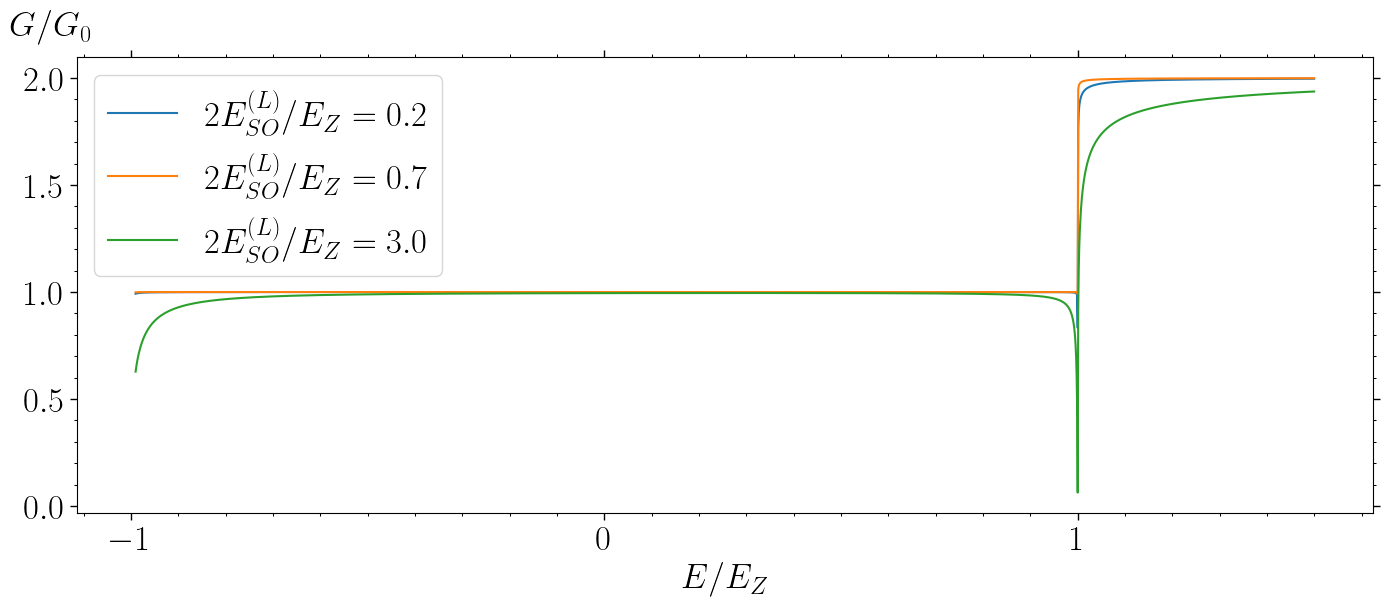

In [7]:
%matplotlib inline
# %matplotlib notebook

plt.rcParams['text.usetex'] = True

renormallize_result(trasmission_coeff_total)

fig, axs = plt.subplots(1, figsize=(14, 6), dpi=100, tight_layout=True, facecolor='white')


# font = {'family': "Times New Roman", "size": 25}
# line_label = r"$$ \frac{{E_{{SO,L}}}}{{E_{{SO,R}}}} = {0}$$"
line_label = r"$$ E_{{SO}}^{{(L)}} = {0} E_{{SO}}^{{(R)}} $$"


k = list(trasmission_coeff_total.keys())
n = 0
for k in trasmission_coeff_total.keys():

    axs.plot(enn, trasmission_coeff_total[k][0],
                   label=fr"$$ 2E_{{SO}}^{{(L)}}/E_Z = {2*k}$$")



# y_label_pos = [(-.02, 1.03), (-.09, 1)]

axs.legend(fontsize = legend_font_size)
# axs[i, j].grid(True)#which='both')
axs.set_xlabel(x_label, fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)# , loc = 'top'
axs.yaxis.set_label_coords(*y_label_pos[0])
        
x_magior = np.array([[1]])
x_minor = np.array([[0.1]])

y_magior = np.array([[0.5]])
y_minor = np.array([[0.1]])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])


# fig.suptitle(fr"$$E_{{so, R}} = {alp_r} h_\perp$$", fontsize=font["size"], y = 1.01)
      
plt.savefig(BASE_PATH+"fig_1a.pdf", 
            transparent = False, 
            bbox_inches='tight')
plt.show()

### T vs E at constant $E_Z$ and $E_{so,R} = E_Z/4$ with parameters $2E_{so,L}/E_Z=-0.2, -0.7, -3$

In [153]:
alp_r = 1/4-1E-4
Eso_profile = [-1, alp_r]
x_profile = [0]

junction = RashbaJunction([x_profile, Eso_profile])

# trasmission_coeff = {}
# trasmission_coeff_deriv = {}
    
def g(x, par):
#     junction[1] = -par
    if x < -1 and np.abs(par) < 0.5 or -np.abs(par)*(1+(1/(2*np.abs(par)))**2) > x:
        return np.nan
    else:
        junction[0] = par
        S = junction.get_scattering_matrix(x)
        if not S.is_unitary:
            print(f"not unitary matrix length: {x}, E_so: {par}")
            return np.nan
        else:
            return S.t_coef


# def gp(x, par):
#     dx = 0.0001
# #     junction[1] = -par
#     if (x+dx) < -1 and np.abs(par) < 0.5 or -np.abs(par)*(1+(1/(2*np.abs(par)))**2) > (x+dx):
#         return np.nan
#     else:
#         junction[0] = par
#         S1 = junction.get_scattering_matrix(x-dx/2)
#         S2 = junction.get_scattering_matrix(x+dx/2)
#         if not S1.is_unitary and S2.is_unitary:
#             print(f"not unitary matrix length: {x}, E_so: {par}")
#             return np.nan
#         else:
#             return (-S1.t_coef + S2.t_coef)/dx       

alpha_l = -np.array([0.2, 0.7, 3])/2
enn = np.arange(-0.99, 1.5, 0.0011)
trasmission_coeff_total = make_grid(enn, alpha_l, [g])#[g, gp])

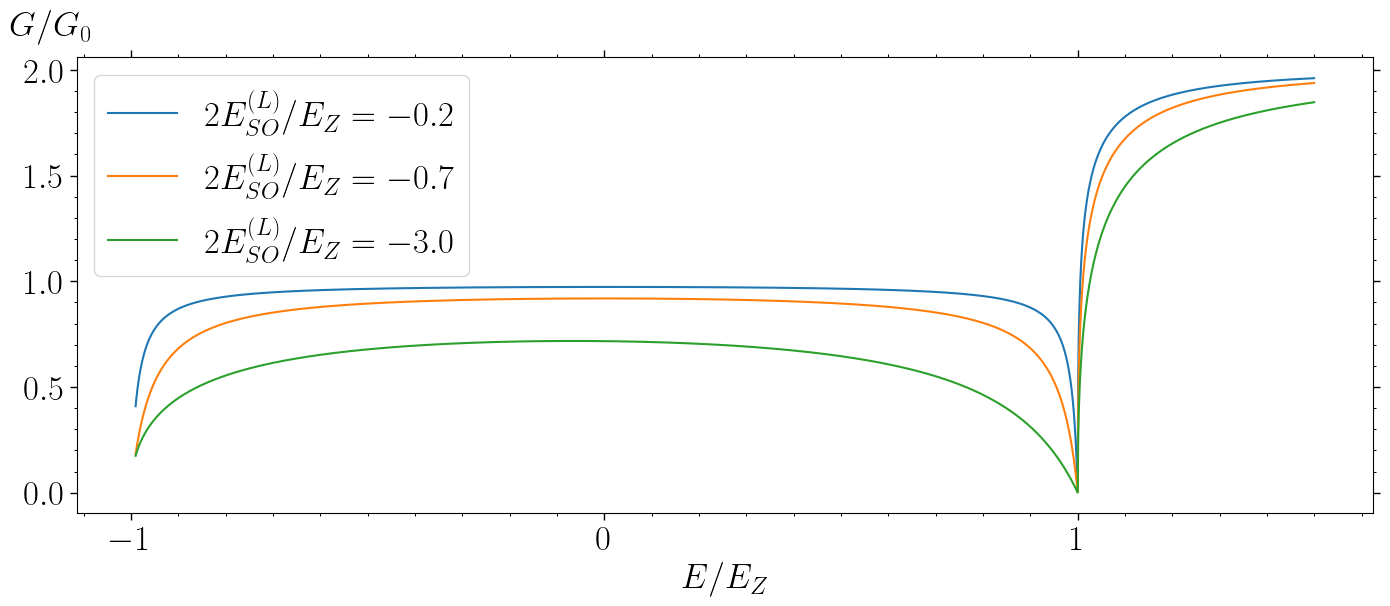

In [154]:
%matplotlib inline
# %matplotlib notebook

plt.rcParams['text.usetex'] = True

renormallize_result(trasmission_coeff_total)

fig, axs = plt.subplots(1, figsize=(14, 6), dpi=100, tight_layout=True, facecolor='white')


line_label = r"$$ E_{{SO}}^{{(L)}} = {0} E_{{SO}}^{{(R)}} $$"


k = list(trasmission_coeff_total.keys())
n = 0
for k in trasmission_coeff_total.keys():

    axs.plot(enn, trasmission_coeff_total[k][0],
                   label=fr"$$ 2E_{{SO}}^{{(L)}}/E_Z = {2*k}$$")


# y_label_pos = [(-.02, 1), (-.09, 1)]

axs.legend(fontsize = legend_font_size)
# axs[i, j].grid(True)#which='both')
axs.set_xlabel(x_label, fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)# , loc = 'top'
axs.yaxis.set_label_coords(*y_label_pos[0])
        
x_magior = np.array([[1]])
x_minor = np.array([[0.1]])

y_magior = np.array([[0.5]])
y_minor = np.array([[0.1]])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

# fig.suptitle(fr"$$E_{{so, R}} = {alp_r} h_\perp$$", fontsize=font["size"], y = 1.01)
      
plt.savefig(BASE_PATH+"fig_1b.pdf", 
            transparent = False, 
            bbox_inches='tight')
plt.show()

### Analisi

In [525]:
alp_r = 1/4-1E-4
Eso_profile = [-1, alp_r]
x_profile = [0]
ee = 0

junction = RashbaJunction([x_profile, Eso_profile])
alpha_l = np.array([0.2, 0.7, 3, -0.2, -0.7, -3])/2

junction.E_so = junction[1]
junction.prepare_rashba_WF(0, ee)    
r = 0
print(junction.sgn_k[r][1])
thetap = np.round(np.arccos(2 * junction.sgn_alpha * junction.sgn_k[r][1]* np.sqrt(junction.E_0(ee, junction.l[r], junction.mod[r])*junction.E_so/(1+4*junction.E_0(ee, junction.l[r], junction.mod[r])*junction.E_so)))/np.pi, 3)
r = 1
print(junction.sgn_k[r][1])
thetam = np.round(np.arccos(2 * junction.sgn_alpha * junction.sgn_k[r][1]* np.sqrt(junction.E_0(ee, junction.l[r], junction.mod[r])*junction.E_so/(1+4*junction.E_0(ee, junction.l[r], junction.mod[r])*junction.E_so)))/np.pi, 3)
kappa = 3
theta3 = np.round(
        np.arctan(2 * junction.sgn_alpha * junction.sgn_k[kappa][1] * np.sqrt(junction.E_0(ee, junction.l[kappa], junction.mod[kappa])*junction.E_so/(1 - 4*junction.E_0(ee, junction.l[kappa], junction.mod[kappa])*junction.E_so)))/np.pi, 3)

print(thetap, thetam, theta3)


for i in alpha_l:
    junction[0] = i
    S = junction.get_scattering_matrix(ee)
    
    junction.E_so = junction[0]
    junction.prepare_rashba_WF(0, ee)
    
    r = 0
    thetap = np.round(np.arccos(2 * junction.sgn_alpha * junction.sgn_k[r][1]* np.sqrt(junction.E_0(ee, junction.l[r], junction.mod[r])*junction.E_so/(1+4*junction.E_0(ee, junction.l[r], junction.mod[r])*junction.E_so)))/np.pi, 3)
    r = 1
    thetam = np.round(np.arccos(2 * junction.sgn_alpha * junction.sgn_k[r][1]* np.sqrt(junction.E_0(ee, junction.l[r], junction.mod[r])*junction.E_so/(1+4*junction.E_0(ee, junction.l[r], junction.mod[r])*junction.E_so)))/np.pi, 3)
    
    
    print(f"For $2 E_{{SO}}^{{(L)}}/ E_Z = {2*i}$; $\\theta(+k^{{(L)}}(0)) = {thetap} \pi$; $\\theta(-k^{{(L)}}(0)) = {thetam} \pi$")
    print("\\begin{align}")
    print("\t\\left| \hat{b}_{1, E}^{(L)} \\right| &= "+f"{np.round(np.linalg.norm(S.C[0,0]), 6)}\\\ ")
    print("\t\\left| \hat{b}_{1, E}^{(R)}\\right| &= "+f"{np.round(np.linalg.norm(S.C[1,0]), 6)}\\\ ")
    
    kappa = 2
    theta2 = np.round(
        np.arctan(2 * junction.sgn_alpha * junction.sgn_k[kappa][1]* np.sqrt(junction.E_0(ee, junction.l[kappa], junction.mod[kappa])*junction.E_so/(1 - 4*junction.E_0(ee, junction.l[kappa], junction.mod[kappa])*junction.E_so)))/np.pi, 3)
    print("\t\\left| \hat{\\alpha}_{E}^{(L)}\\right| &= "+f"{np.round(np.linalg.norm(S.C[2,0]), 6)}\\quad \\varphi(+\\kappa^{{(L)}}(0)) = {theta2} \pi\\\ ")
    
    print("\t\\left| \hat{\\alpha}_{E}^{(R)}\\right| &= "+f"{np.round(np.linalg.norm(S.C[3,0]), 6)}")
    print("\\end{align}")
#     print("#"*10)

1.0
-1.0
0.212 0.788 -0.288
For $2 E_{SO}^{(L)}/ E_Z = 0.2$; $\theta(+k^{(L)}(0)) = 0.306 \pi$; $\theta(-k^{(L)}(0)) = 0.694 \pi$
\begin{align}
	\left| \hat{b}_{1, E}^{(L)} \right| &= 0.00795\\ 
	\left| \hat{b}_{1, E}^{(R)}\right| &= 1.024919\\ 
	\left| \hat{\alpha}_{E}^{(L)}\right| &= 0.088532\quad \varphi(+\kappa^{(L)}(0)) = 0.194 \pi\\ 
	\left| \hat{\alpha}_{E}^{(R)}\right| &= 0.091278
\end{align}
For $2 E_{SO}^{(L)}/ E_Z = 0.7$; $\theta(+k^{(L)}(0)) = 0.174 \pi$; $\theta(-k^{(L)}(0)) = 0.826 \pi$
\begin{align}
	\left| \hat{b}_{1, E}^{(L)} \right| &= 0.001803\\ 
	\left| \hat{b}_{1, E}^{(R)}\right| &= 1.001039\\ 
	\left| \hat{\alpha}_{E}^{(L)}\right| &= 0.042368\quad \varphi(+\kappa^{(L)}(0)) = 0.326 \pi\\ 
	\left| \hat{\alpha}_{E}^{(R)}\right| &= 0.042488
\end{align}
For $2 E_{SO}^{(L)}/ E_Z = 3.0$; $\theta(+k^{(L)}(0)) = 0.052 \pi$; $\theta(-k^{(L)}(0)) = 0.948 \pi$
\begin{align}
	\left| \hat{b}_{1, E}^{(L)} \right| &= 0.071669\\ 
	\left| \hat{b}_{1, E}^{(R)}\right| &= 1.200781\\ 


In [418]:
alp_r = 1/4-1E-4
Eso_profile = [-1, alp_r]
x_profile = [0]
ee = -0.95

junction = RashbaJunction([x_profile, Eso_profile])
alpha_l = np.array([0.2, 0.7, 3, -0.2, -0.7, -3])/2

junction.E_so = junction[1]
junction.prepare_rashba_WF(0, ee)    
r = 0
thetap = np.round(np.arccos(2 * junction.sgn_alpha * junction.sgn_k[r][1]* np.sqrt(junction.E_0(ee, junction.l[r], junction.mod[r])*junction.E_so/(1+4*junction.E_0(ee, junction.l[r], junction.mod[r])*junction.E_so)))/np.pi, 3)
r = 1
thetam = np.round(np.arccos(2 * junction.sgn_alpha * junction.sgn_k[r][1]* np.sqrt(junction.E_0(ee, junction.l[r], junction.mod[r])*junction.E_so/(1+4*junction.E_0(ee, junction.l[r], junction.mod[r])*junction.E_so)))/np.pi, 3)
kappa = 3
theta3 = np.round(
        np.arctan(2 * junction.sgn_alpha * junction.sgn_k[kappa][1] * np.sqrt(junction.E_0(ee, junction.l[kappa], junction.mod[kappa])*junction.E_so/(1 - 4*junction.E_0(ee, junction.l[kappa], junction.mod[kappa])*junction.E_so)))/np.pi, 3)


print(f"\\begin{{align}}\n\
        &\\theta(+k^{{(R)}}({ee})) = {thetap} \\pi\\\ \n\
        &\\theta(-k^{{(R)}}({ee})) = {thetam} \\pi\\\ \n\
        &\\varphi(-\kappa_+^{{(R)}}({ee})) = {theta3} \\pi\n\
\\end{{align}}"
)

for i in alpha_l:
    junction[0] = i
    S = junction.get_scattering_matrix(ee)
    
    junction.E_so = junction[0]
    junction.prepare_rashba_WF(0, ee)
    
    r = 0
    thetap = np.round(np.arccos(2 * junction.sgn_alpha * junction.sgn_k[r][1]* np.sqrt(junction.E_0(ee, junction.l[r], junction.mod[r])*junction.E_so/(1+4*junction.E_0(ee, junction.l[r], junction.mod[r])*junction.E_so)))/np.pi, 3)
    r = 1
    thetam = np.round(np.arccos(2 * junction.sgn_alpha * junction.sgn_k[r][1]* np.sqrt(junction.E_0(ee, junction.l[r], junction.mod[r])*junction.E_so/(1+4*junction.E_0(ee, junction.l[r], junction.mod[r])*junction.E_so)))/np.pi, 3)
    
    
    print(f"For $2 E_{{SO}}^{{(L)}}/ E_Z = {2*i}$; $\\theta(+k^{{(L)}}({ee})) = {thetap} \pi$; $\\theta(-k^{{(L)}}({ee})) = {thetam} \pi$")
    print("\\begin{align}")
    print("\t\\left| \hat{b}_{1, E}^{(L)} \\right| &= "+f"{np.round(np.linalg.norm(S.C[0,0]), 6)}\\\ ")
    print("\t\\left| \hat{b}_{1, E}^{(R)}\\right| &= "+f"{np.round(np.linalg.norm(S.C[1,0]), 6)}\\\ ")
    
    kappa = 2
    theta2 = np.round(
        np.arctan(2 * junction.sgn_alpha * junction.sgn_k[kappa][1]* np.sqrt(junction.E_0(ee, junction.l[kappa], junction.mod[kappa])*junction.E_so/(1 - 4*junction.E_0(ee, junction.l[kappa], junction.mod[kappa])*junction.E_so)))/np.pi, 3)
    print("\t\\left| \hat{\\alpha}_{E}^{(L)}\\right| &= "+f"{np.round(np.linalg.norm(S.C[2,0]), 6)}\\quad \\varphi(+\\kappa^{{(L)}}({ee})) = {theta2} \pi\\\ ")
    
    print("\t\\left| \hat{\\alpha}_{E}^{(R)}\\right| &= "+f"{np.round(np.linalg.norm(S.C[3,0]), 6)}")
    print("\\end{align}")
#     print("#"*10)

\begin{align}
        &\theta(+k^{(R)}(-0.95)) = 0.404 \pi\\ 
        &\theta(-k^{(R)}(-0.95)) = 0.596 \pi\\ 
        &\varphi(-\kappa_+^{(R)}(-0.95)) = -0.485 \pi
\end{align}
For $2 E_{SO}^{(L)}/ E_Z = 0.2$; $\theta(+k^{(L)}(-0.95)) = 0.45 \pi$; $\theta(-k^{(L)}(-0.95)) = 0.55 \pi$
\begin{align}
	\left| \hat{b}_{1, E}^{(L)} \right| &= 0.039057\\ 
	\left| \hat{b}_{1, E}^{(R)}\right| &= 1.106603\\ 
	\left| \hat{\alpha}_{E}^{(L)}\right| &= 0.088927\quad \varphi(+\kappa^{(L)}(-0.95)) = 0.29 \pi\\ 
	\left| \hat{\alpha}_{E}^{(R)}\right| &= 0.11714
\end{align}
For $2 E_{SO}^{(L)}/ E_Z = 0.7$; $\theta(+k^{(L)}(-0.95)) = 0.363 \pi$; $\theta(-k^{(L)}(-0.95)) = 0.637 \pi$
\begin{align}
	\left| \hat{b}_{1, E}^{(L)} \right| &= 0.014192\\ 
	\left| \hat{b}_{1, E}^{(R)}\right| &= 0.928162\\ 
	\left| \hat{\alpha}_{E}^{(L)}\right| &= 0.078784\quad \varphi(+\kappa^{(L)}(-0.95)) = 0.403 \pi\\ 
	\left| \hat{\alpha}_{E}^{(R)}\right| &= 0.059709
\end{align}
For $2 E_{SO}^{(L)}/ E_Z = 3.0$; $\theta(+k^{(L)}(

### Wavefunction

In [671]:
ee = 0

alp_r = 1/4-1E-4
# Eso_profile = [0.35, alp_r]
# x_profile = [0]

Eso_profile = [10, -10]
x_profile = [0]

junction = RashbaJunction([x_profile, Eso_profile])
S = junction.get_scattering_matrix(ee)

# junction.E_so = 100
# wf = junction.get_WF(0, 0)
# print(wf[:,2])

def total_WF(x, E, a = [1, 0]):
    # left part
    if x <= junction.interface[0]:
        junction.E_so = junction[0]
        wf = junction.get_WF(x, E)
        injected = a[0]*wf[:, 0]
        reflected = np.dot(S.C[:2,:], np.array(a))[0]*wf[:, 1]
        evanescent = np.dot(S.C[2:, :], np.array(a))[0]*wf[:, 2]
        
#         if np.isclose(x, 0, atol = 1e-3):
#             print("left")
#             print(f"|r| {np.linalg.norm(np.dot(S.C[:2,:], np.array(a))[0])}")
#             print(f"|pho| {np.linalg.norm(np.dot(S.C[2:,:], np.array(a))[0])}")
            
    elif x > junction.interface[0]:
        junction.E_so = junction[1]    
        wf = junction.get_WF(x, E)
        injected = a[1]*wf[:, 1]
        reflected = np.dot(S.C[:2,:], np.array(a))[1]*wf[:, 0]
        evanescent = np.dot(S.C[2:, :], np.array(a))[1]*wf[:, 3]
#         if np.isclose(x, 0, atol = 1e-3):
#             print("rigth")
#             print(f"|t| {np.linalg.norm(np.dot(S.C[:2,:], np.array(a))[1])}")
#             print(f"|gamma| {np.linalg.norm(np.dot(S.C[2:,:], np.array(a))[1])}")
    return injected + reflected + evanescent

def evanescent_WF(x, E, a = [1, 0]):
    # left part
    if x <= junction.interface[0]:
        junction.E_so = junction[0]
        wf = junction.get_WF(x, E)
#         injected = a[0]*wf[:, 0]
#         reflected = np.dot(S.C[:2,:], np.array(a))[0]*wf[:, 1]
        evanescent = np.dot(S.C[2:, :], np.array(a))[0]*wf[:, 2]
        if np.isclose(x, 0, atol = 1e-3):
            print(wf[:, 2])
            print(evanescent/np.linalg.norm(np.dot(S.C[2:,:], np.array(a))[0]))
            print(f"|pho| {np.linalg.norm(np.dot(S.C[2:,:], np.array(a))[0])}")
            print(np.angle(np.dot(S.C[2:,:], np.array(a))[0])/np.pi)
            
            

            
    elif x > junction.interface[0]:
        junction.E_so = junction[1]    
        wf = junction.get_WF(x, E)
#         injected = a[1]*wf[:, 1]
#         reflected = np.dot(S.C[:2,:], np.array(a))[1]*wf[:, 0]
        evanescent = np.dot(S.C[2:, :], np.array(a))[1]*wf[:, 3]
        if np.isclose(x, 0, atol = 1e-3):
            print("#"*10)
            print(wf[:, 3])
            print(evanescent/np.linalg.norm(np.dot(S.C[2:,:], np.array(a))[1]))
            print(f"|gamma| {np.linalg.norm(np.dot(S.C[2:,:], np.array(a))[1])}")
            print(np.angle(np.dot(S.C[2:,:], np.array(a))[1])/np.pi)
            
            

#     return injected + reflected + evanescent
    return evanescent
    

    
real_1 = []
imag_1 = []

real_2 = []
imag_2 = []

ev_real_1 = []
ev_imag_1 = []

ev_real_2 = []
ev_imag_2 = []

x_range = np.arange(-5, 5, 0.001)
# x_range = np.arange(-2.5, 2.5, 0.001)
for xx in x_range:
    r = total_WF(xx, ee)
    real_1.append(r[0].real)
    real_2.append(r[1].real)
    
    imag_1.append(r[0].imag)
    imag_2.append(r[1].imag)
    
    r2 = evanescent_WF(xx, ee)
    ev_real_1.append(r2[0].real)
    ev_real_2.append(r2[1].real)
    
    ev_imag_1.append(r2[0].imag)
    ev_imag_2.append(r2[1].imag)
    

[-0.01766384-0.70677433j  0.70699502+0.j        ]
[-0.06155986-0.70430984j  0.70562801-0.04394389j]
|pho| 0.07031584820860887
-0.019797588111601771266
##########
[-0.01766663-0.70688605j  0.70710678+0.j        ]
[0.70661693-0.02631566j 0.00865305+0.70705383j]
|gamma| 1.4080737630634743
0.4961046631447982306


2 E_SO^(L)/E_Z= 20,  2E_SO^(R)/E_Z=-19.9998,  E/E_Z = 0$$


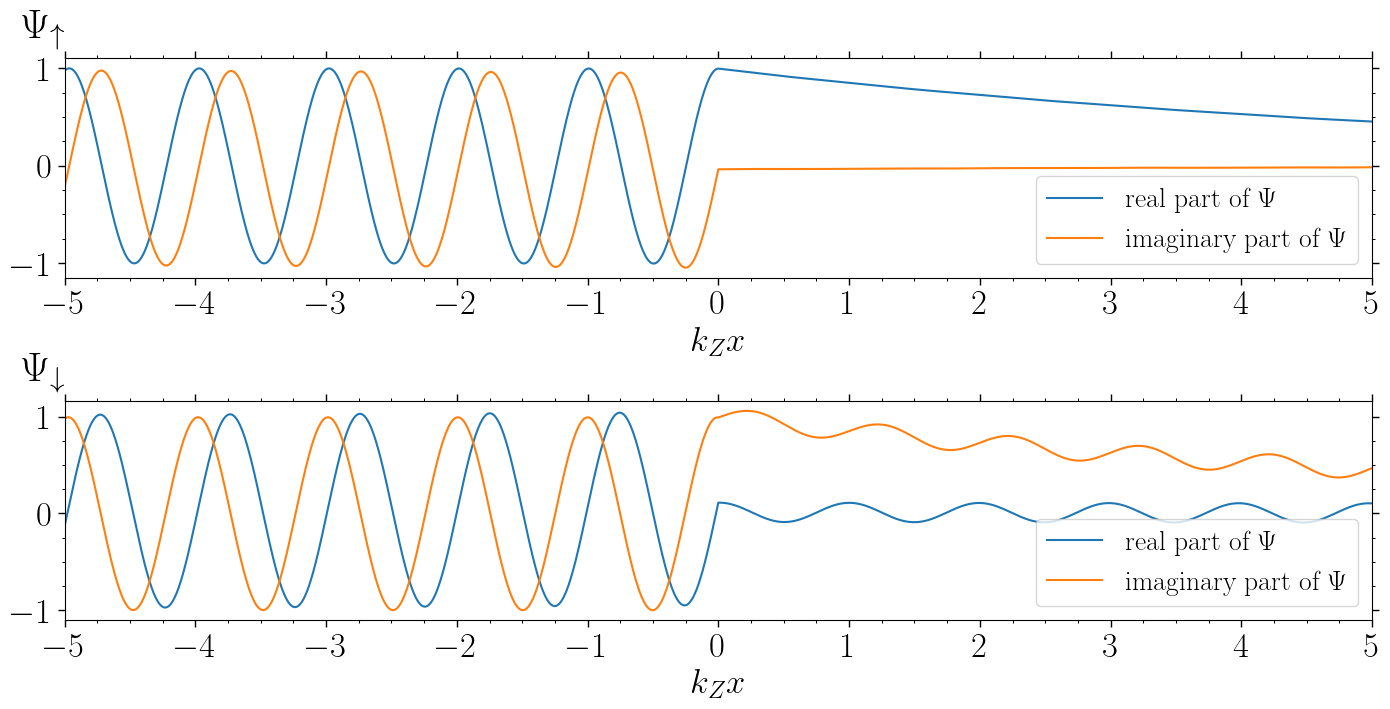

In [676]:
%matplotlib inline


plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(2, 1, figsize=(14, 7), dpi=100, tight_layout=True, facecolor='white')

labels_ = [r"real part of $\Psi$", 
           r"imaginary part of $\Psi$ ", 
           "evanescent mode\n real part", 
           "evanescent mode\n imaginary part"]

axs[0].plot(x_range, real_1, label=labels_[0])
axs[0].plot(x_range, imag_1, label=labels_[1])


# axs[0].plot(x_range, ev_real_1, label=labels_[2])
# axs[0].plot(x_range, ev_imag_1, label=labels_[3])
# axs[0].set_title("spin up", fontsize = 25)

axs[1].plot(x_range, real_2, label=labels_[0])
axs[1].plot(x_range, imag_2, label= labels_[1])
# axs[1].plot(x_range, ev_real_2, label= labels_[2])
# axs[1].plot(x_range, ev_imag_2, label=labels_[3])
# axs[1].set_title("spin down", fontsize = 25)



x_magior = np.array([1, 1])
x_minor = np.array([0.25, .25])

# y_magior = np.array([1, 0.2])
# y_minor = np.array([0.25, 0.05])
y_magior = np.array([1, 1])
y_minor = np.array([0.25, 0.25])
adjuct_Tick(axs, x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font['size'])

anchor = (1, 1.1)
y_label_pos2 = [(-.016, 1.04), (-.016, 1.04)]
y_label2 = [r"$\Psi_\uparrow$", r"$\Psi_\downarrow$"]
for j, i in enumerate(axs):
    i.set_xlabel(r"$k_Z x$", fontdict=font)
    i.set_ylabel(y_label2[j], rotation=0, fontdict=font, fontsize= 30)
    i.set_xlim(-5, 5)
    i.yaxis.set_label_coords(*y_label_pos2[j])
    
    i.legend(fontsize = 20)#, bbox_to_anchor=anchor)
#     i.grid(True)

    
# fig.suptitle(fr"$$2 E_{{SO}}^{{(L)}}/E_Z= {2*Eso_profile[0]},  2E_{{SO}}^{{(R)}}/E_Z={2*(Eso_profile[1]+1E-4)}, \, E/E_Z = {ee}$$", fontsize=16)
print(f"2 E_SO^(L)/E_Z= {2*Eso_profile[0]},  2E_SO^(R)/E_Z={2*(Eso_profile[1]+1E-4)},  E/E_Z = {ee}$$")

# save_path = BASE_PATH+"wavefuncton-2ESO=07Ez.pdf"
# save_path = BASE_PATH+"wavefuncton-2ESO=3Ez.pdf"

save_path = BASE_PATH_SLIDE+"wavefuncton_Dirac_paradox_single_interface.pdf"
# save_path = BASE_PATH+"wavefuncton-2ESO=3Ez_legend.pdf"

plt.savefig(save_path, transparent = False, 
                        bbox_inches='tight')

plt.show()

## Figure 2

### T vs E at constant $E_{so,L}/E_{so,R} = 0.8$ and parameters $E_Z/E_{so,R}=0.5,3,5 $

In [ ]:
alp_l_to_alp_r = 0.8
E_SO_R = 10
Eso_profile = [-1, 1]
x_profile = [0]

junction = RashbaJunction([x_profile, Eso_profile])

# trasmission_coeff = {}
# trasmission_coeff_deriv = {}
    
def g(x, par):
#     junction[1] = -par
    if x < -1 and np.abs(1/par) < 0.5 or -np.abs(1/par)*(1+(1/(2*np.abs(1/par)))**2) > x:
        return np.nan
    else:
        junction[0] = alp_l_to_alp_r / par
        junction[1] = 1/par
        S = junction.get_scattering_matrix(x)
        if not S.is_unitary:
            print(f"not unitary matrix length: {x}, E_so: {par}")
            return np.nan
        else:
            return S.t_coef


# def gp(x, par):
#     dx = 0.0001
# #     junction[1] = -par
#     if (x+dx) < -1 and np.abs(par) < 0.5 or -np.abs(par)*(1+(1/(2*np.abs(par)))**2) > (x+dx):
#         return np.nan
#     else:
#         junction[0] = par
#         S1 = junction.get_scattering_matrix(x-dx/2)
#         S2 = junction.get_scattering_matrix(x+dx/2)
#         if not S1.is_unitary and S2.is_unitary:
#             print(f"not unitary matrix length: {x}, E_so: {par}")
#             return np.nan
#         else:
#             return (-S1.t_coef + S2.t_coef)/dx       

# alpha_l = [-alp_r, alp_r, -0.4, 0.4, -0.2, 0.2]

E_z_to_alpha_l = [0.5, 3, 5]
for t in E_z_to_alpha_l:
    print(alp_l_to_alp_r / t, 1 / t)

enn = np.arange(-1.7562, 16, 0.0011)
trasmission_coeff_total = make_grid(enn, E_z_to_alpha_l, [g])#[g, gp])

In [ ]:
%matplotlib inline
# %matplotlib notebook

plt.rcParams['text.usetex'] = True

renormallize_result(trasmission_coeff_total)

fig, axs = plt.subplots(1, figsize=(14, 6), dpi=100, tight_layout=True, facecolor='white')

# line_label = r"$$ \frac{{ E_Z }}{{ E_{{SO,R}} }} = {0}$$"
line_label = r"$$ E_Z = {0} E_{{SO}}^{{(R)}}$$"


k = list(trasmission_coeff_total.keys())
n = 0
for k in trasmission_coeff_total.keys():
    indd = np.where(k*enn<8)[0]
    axs.plot(k*enn[:indd[-1]+1], trasmission_coeff_total[k][0][indd],
                  label=fr"$$ E_Z = {k} E_{{SO}}^{{(R)}}$$")



axs.legend(fontsize = legend_font_size)
# axs[i, j].grid(True)#which='both')
axs.set_xlabel(r"$$ E/E_{SO}^{(R)}$$", fontdict=font)
# axs.set_xlabel(x_label, fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)# , loc = 'top'
axs.yaxis.set_label_coords(*y_label_pos[0])
        
x_magior = np.array([[1]])
x_minor = np.array([[0.1]])

y_magior = np.array([[0.5]])
y_minor = np.array([[0.1]])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

axs.text(0, 1.25, region_lbl[0]+r"\hspace{1cm}$E_{SO}^{(L)} = 0.8 E_{SO}^{(R)}$",
            horizontalalignment='center', 
            verticalalignment='center', 
            transform=axs.transAxes, 
            fontdict=font)
      
plt.savefig(BASE_PATH+"fig_2a.pdf", 
            transparent = False, 
            bbox_inches='tight')
plt.show()

### T vs E at constant $E_{so,L}/E_{so,R} = -0.8$ and parameters $E_Z/E_{so,R}=0.5,3,5 $

In [513]:
alp_l_to_alp_r = -0.8
E_SO_R = 10
Eso_profile = [-1, 1]
x_profile = [0]

junction = RashbaJunction([x_profile, Eso_profile])

# trasmission_coeff = {}
# trasmission_coeff_deriv = {}
    
def g(x, par):
#     junction[1] = -par
    if x < -1 and np.abs(1/par) < 0.5 or -np.abs(1/par)*(1+(1/(2*np.abs(1/par)))**2) > x:
        return np.nan
    else:
        junction[0] = alp_l_to_alp_r / par
        junction[1] = 1/par
        S = junction.get_scattering_matrix(x)
        if not S.is_unitary:
            print(f"not unitary matrix length: {x}, E_so: {par}")
            return np.nan
        else:
            return S.t_coef


# def gp(x, par):
#     dx = 0.0001
# #     junction[1] = -par
#     if (x+dx) < -1 and np.abs(par) < 0.5 or -np.abs(par)*(1+(1/(2*np.abs(par)))**2) > (x+dx):
#         return np.nan
#     else:
#         junction[0] = par
#         S1 = junction.get_scattering_matrix(x-dx/2)
#         S2 = junction.get_scattering_matrix(x+dx/2)
#         if not S1.is_unitary and S2.is_unitary:
#             print(f"not unitary matrix length: {x}, E_so: {par}")
#             return np.nan
#         else:
#             return (-S1.t_coef + S2.t_coef)/dx       

# alpha_l = [-alp_r, alp_r, -0.4, 0.4, -0.2, 0.2]

E_z_to_alpha_l = [0.5, 3, 5]
for t in E_z_to_alpha_l:
    print(alp_l_to_alp_r / t, 1 / t)

enn = np.arange(-1.7562, 16, 0.0011)
trasmission_coeff_total = make_grid(enn, E_z_to_alpha_l, [g])#[g, gp])

-1.6 2.0
-0.26666666666666666 0.3333333333333333
-0.16 0.2


KeyboardInterrupt: 

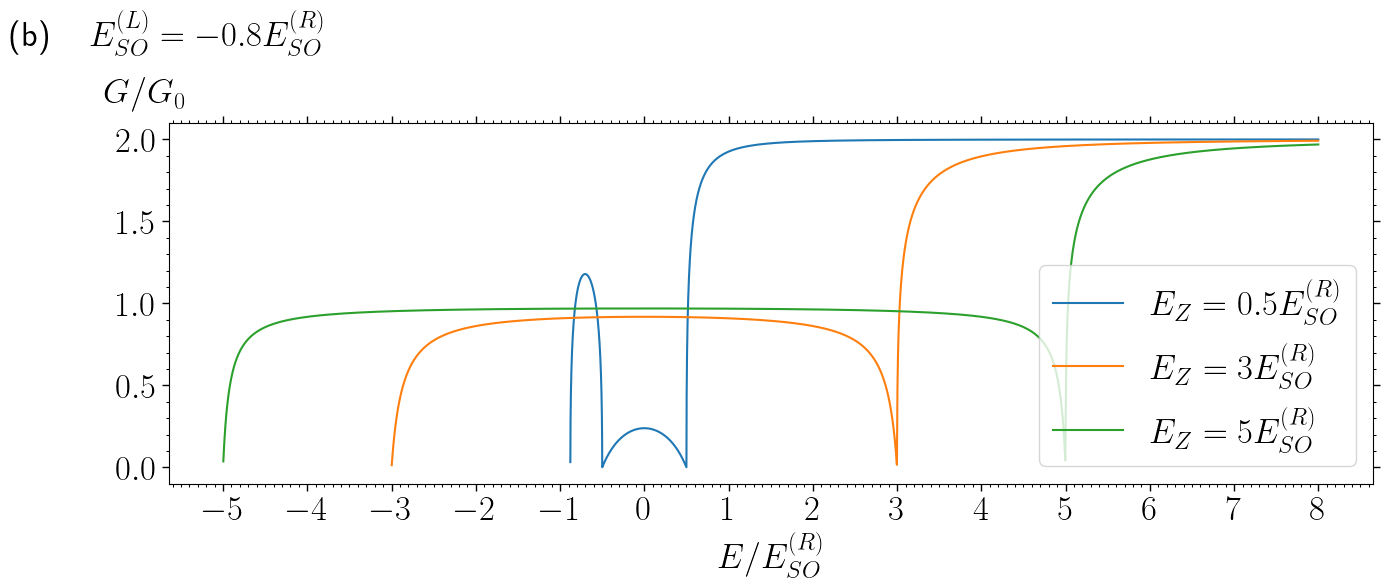

In [369]:
%matplotlib inline
# %matplotlib notebook

plt.rcParams['text.usetex'] = True

renormallize_result(trasmission_coeff_total)

fig, axs = plt.subplots(1, figsize=(14, 6), dpi=100, tight_layout=True, facecolor='white')

# line_label = r"$$ \frac{{ E_Z }}{{ E_{{SO,R}} }} = {0}$$"
line_label = r"$$ E_Z = {0} E_{{SO}}^{{(R)}}$$"


k = list(trasmission_coeff_total.keys())
n = 0
for k in trasmission_coeff_total.keys():
    indd = np.where(k*enn<8)[0]
    axs.plot(k*enn[:indd[-1]+1], trasmission_coeff_total[k][0][indd],
                  label=fr"$$ E_Z = {k} E_{{SO}}^{{(R)}}$$")
#     axs.plot(k*enn, trasmission_coeff_total[k][0],
#                   label=fr"$$ E_Z = {k} E_{{SO}}^{{(R)}}$$")



axs.legend(fontsize = legend_font_size)
# axs[i, j].grid(True)#which='both')
axs.set_xlabel(r"$$ E/E_{SO}^{(R)}$$", fontdict=font)
# axs.set_xlabel(x_label, fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)# , loc = 'top'
axs.yaxis.set_label_coords(*y_label_pos[0])
        
x_magior = np.array([[1]])
x_minor = np.array([[0.1]])

y_magior = np.array([[0.5]])
y_minor = np.array([[0.1]])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])
      
axs.text(0, 1.25, region_lbl[1]+r"\hspace{1cm}$E_{SO}^{(L)} = -0.8 E_{SO}^{(R)}$",
            horizontalalignment='center', 
            verticalalignment='center', 
            transform=axs.transAxes, 
            fontdict=font)
    
plt.savefig(BASE_PATH+"fig_2b.pdf", 
            transparent = False, 
            bbox_inches='tight')
plt.show()

# 2 interfaces

## Lead Model $0 | \alpha | 0$

In [71]:
D_SO = [6.4, 6.64, 6.88, 7.12]
D_Z = 12.8

for eso in D_SO:
    print(eso**2/ (2*D_Z))


1.6000000000000003
1.7222499999999998
1.8489999999999998
1.98025


### T vs $E$ for fixed $E_{so}$, $d$

In [48]:
alp_r = -10
Eso_profile = [0, alp_r, 0]
x_profile = [0, 1]

junction = RashbaJunction2([x_profile, Eso_profile])


def g(x, par):
    junction[1] = par[1]
    junction.interface[0] = -par[0] /2 # / np.sqrt(np.abs(par[1]))
    junction.interface[1] = par[0] /2
    if x < -1 and np.abs(par[1]) < 0.5 or -np.abs(par[1])*(1+(1/(2*np.abs(par[1])))**2) > x:
        return np.nan
    else:
        S = junction.get_scattering_matrix(x)
        if not S.is_unitary:
            print(f"not unitary matrix length: x-> {x}, par-> {par}")
            return np.nan
        else:
            return S.t_coef


param = [(0.1, 0.1), (0.1, 0.4), (0.1, 10), 
         (1, 0.1), (1, 0.4), (1, 10),
        (10, 0.1), (10, 0.4), (10, 10)]

# param = [(.1, .1), (.1, .4), (.1, 10), (10, .1), (10, .4), (10, 10)]

en = np.arange(-1+1e-7, 1.5, 0.0011)

special_opoints = [1]
err = [-1e-10]
for p, e in zip(special_opoints, err):
    idx = np.abs(en - p).argmin()
    en[idx] = p + e
trasmission_coeff_total = make_grid(en, param, [g])

# renormallize_result(trasmission_coeff_total, dy=7)

0.1
0.1
0.1
plots/tesi/3_Transport_poroperties_RNW/py/1_T(E)_for_kZd=01(0|alpha|0).pdf


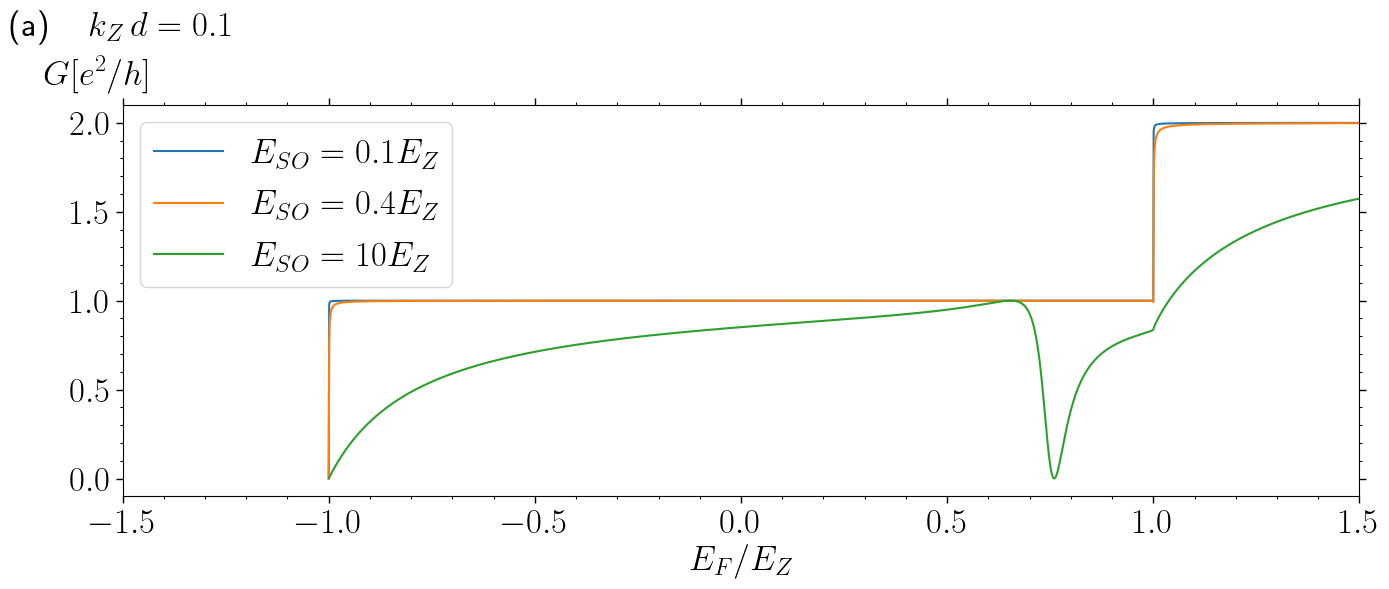

In [64]:
%matplotlib inline
# %matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(14, 6), dpi=100, tight_layout=True, facecolor='white')

# y_label = ["T", r"$$\frac{dT}{dE}$$"]
# font = {'family': "Times New Roman", "size": 25}
# y_label_pos = [(-.05, 1), (-.09, 1)]

k_list = list(trasmission_coeff_total.keys())
for k in k_list[0:3]:
    print(k[0])
    if k[1] == 1:
        axs.plot(en, trasmission_coeff_total[k][0],
                   label=r"$$ E_{{SO}} = E_Z$$")
    else:
        axs.plot(en, trasmission_coeff_total[k][0],
                   label=fr"$$ E_{{SO}} = {k[1]}  E_Z$$")

axs.legend(fontsize = legend_font_size)
axs.set_xlabel(x_label[0], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0,fontdict=font)
axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])
axs.set_xlim(-1.5, 1.5)

# axs.text(0, 1.2, region_lbl[0]+r"\hspace{1cm}$k_{SO} \, d = 0.3$",
axs.text(0, 1.2, region_lbl[0]+r"\hspace{1cm}$k_{Z} \, d = "+f"{k_list[0][0]}$",
            horizontalalignment='center', 
            verticalalignment='center', 
            transform=axs.transAxes, 
            fontdict=font)

SAVE = True
path = BASE_PATH+f"1_T(E)_for_kZd=01(0|alpha|0).pdf"
print(path)
if SAVE:
#     plt.savefig(BASE_PATH+f"1_T(E)_for_k={k_list[0][0]}kso(0|alpha|0).pdf", 
    plt.savefig(path, 
            transparent = False, 
            bbox_inches='tight')

# plt.savefig(BASE_PATH_SLIDE+f"1_T(E)_for_dkso={k_list[0][0]}(0|alpha|0).pdf", 
#             transparent = True, 
#             bbox_inches='tight')
plt.show()

1
1
1
plots/tesi/3_Transport_poroperties_RNW/py/1_T(E)_for_kZd=1(0|alpha|0).pdf


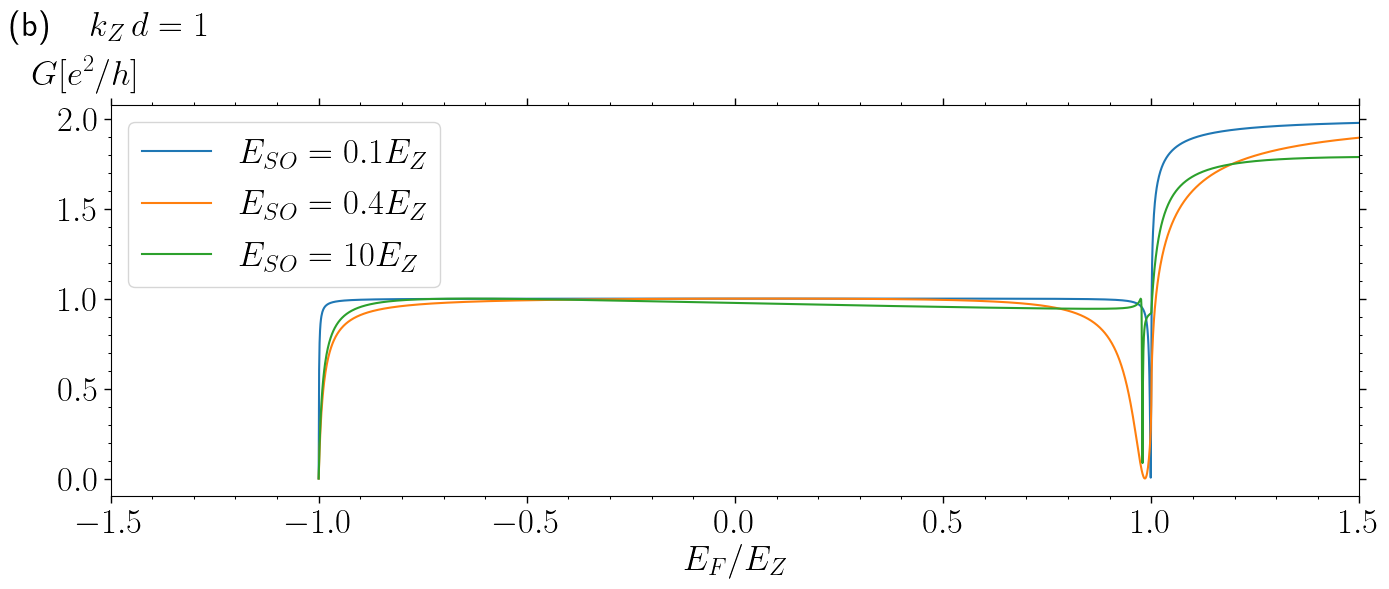

In [65]:
%matplotlib inline
# %matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(14, 6), dpi=100, tight_layout=True, facecolor='white')

# y_label = ["T", r"$$\frac{dT}{dE}$$"]
# font = {'family': "Times New Roman", "size": 25}
# y_label_pos = [(-.05, 1), (-.09, 1)]

k_list = list(trasmission_coeff_total.keys())
for k in k_list[3:6]:
    print(k[0])
    if k[1] == 1:
        axs.plot(en, trasmission_coeff_total[k][0],
                   label=r"$$ E_{{SO}} = E_Z$$")
    else:
        axs.plot(en, trasmission_coeff_total[k][0],
                   label=fr"$$ E_{{SO}} = {k[1]}  E_Z$$")
#     axs.plot(en, 
#             trasmission_coeff_total[k][0], 
#                 label=fr"$$\frac{{ E_{{SO}} }}{{ E_z }} = {k[1]} $$")

axs.legend(fontsize = legend_font_size)
axs.set_xlabel(x_label[0], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)
axs.yaxis.set_label_coords(*y_label_pos[0])
# axs.yaxis.set_label_coords(-.04, 1)
axs.set_xlim(-1.5, 1.5)


x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])
# axs.text(0, 1.2, region_lbl[1]+r"\hspace{1cm}$k_{SO} \, d = 1$",
axs.text(0, 1.2, region_lbl[1]+r"\hspace{1cm}$k_{Z} \, d = "+f"{k_list[3][0]}$",
            horizontalalignment='center', 
            verticalalignment='center', 
            transform=axs.transAxes,
            fontdict=font)

# SAVE = False
SAVE = True
path = BASE_PATH+f"1_T(E)_for_kZd={k_list[3][0]}(0|alpha|0).pdf"
print(path)
if SAVE:
#     plt.savefig(BASE_PATH+"1_T(E)_for_k=kso(0|alpha|0).pdf", 
    plt.savefig(path, 
            transparent = False, 
            bbox_inches='tight')

# plt.savefig(BASE_PATH_SLIDE+f"1_T(E)_for_dkso={k_list[3][0]}(0|alpha|0).pdf", 
#             transparent = True, 
#             bbox_inches='tight')
plt.show()

10
10
10
plots/tesi/3_Transport_poroperties_RNW/py/1_T(E)_for_kZd=10(0|alpha|0).pdf


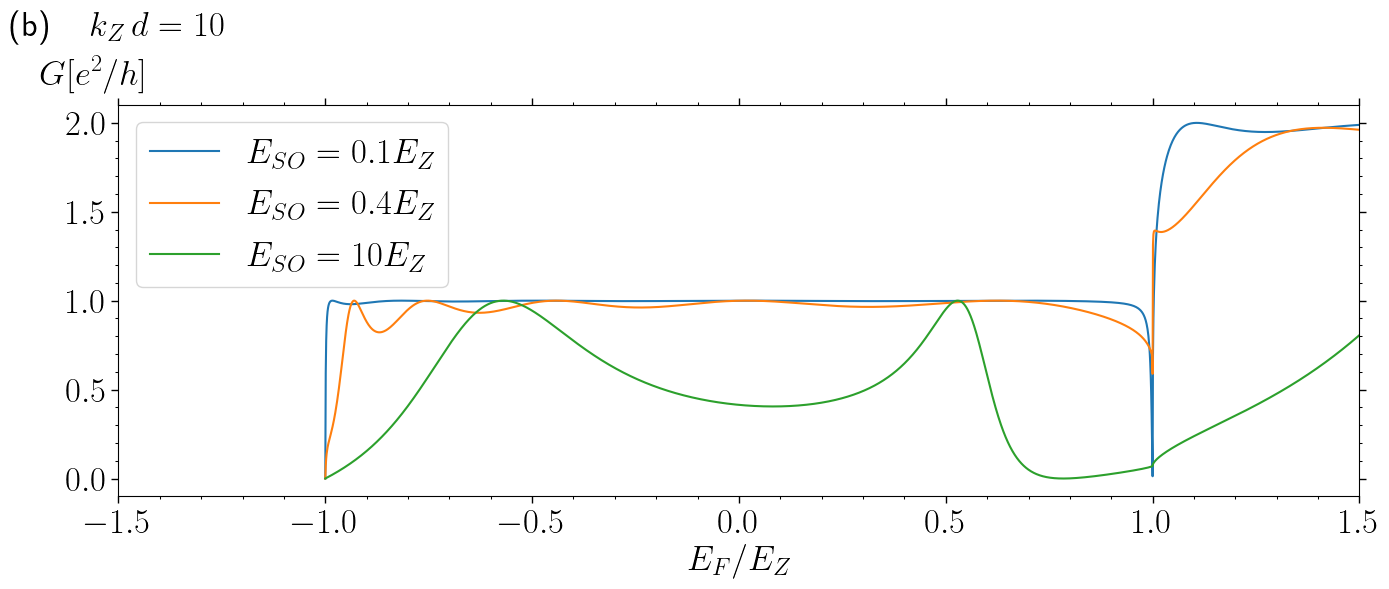

In [66]:
%matplotlib inline
# %matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(14, 6), dpi=100, tight_layout=True, facecolor='white')

# y_label = ["T", r"$$\frac{dT}{dE}$$"]
# font = {'family': "Times New Roman", "size": 25}
# y_label_pos = [(-.05, 1), (-.09, 1)]

k_list = list(trasmission_coeff_total.keys())
for k in k_list[6:]:
    print(k[0])
    if k[1] == 1:
        axs.plot(en, trasmission_coeff_total[k][0],
                   label=r"$$ E_{{SO}} = E_Z$$")
    else:
        axs.plot(en, trasmission_coeff_total[k][0],
                   label=fr"$$ E_{{SO}} = {k[1]}  E_Z $$")
#     axs.plot(en,
#             trasmission_coeff_total[k][0], 
#                 label=fr"$$\frac{{ E_{{SO}} }}{{ E_z }} = {k[1]} $$")

axs.legend(fontsize = legend_font_size)
axs.set_xlabel(x_label[0], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)
axs.yaxis.set_label_coords(*y_label_pos[0])
axs.set_xlim(-1.5, 1.5)


x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])
# axs.text(0, 1.2, region_lbl[2]+r"\hspace{1cm}$k_{SO} \, d = 6$",
axs.text(0, 1.2, region_lbl[1]+r"\hspace{1cm}$k_{Z} \, d = "+f"{k_list[6][0]}$",
            horizontalalignment='center', 
            verticalalignment='center', 
            transform=axs.transAxes, 
            fontdict=font)

# SAVE = False
SAVE = True
path = BASE_PATH+f"1_T(E)_for_kZd={k_list[6][0]}(0|alpha|0).pdf"
print(path)
if SAVE:
#     plt.savefig(BASE_PATH+"1_T(E)_for_k=6kso(0|alpha|0).pdf", 
    plt.savefig(path, 
            transparent = False, 
            bbox_inches='tight')


# plt.savefig(BASE_PATH_SLIDE+f"1_T(E)_for_dkso={k_list[6][0]}(0|alpha|0).pdf", 
#             transparent = True, 
#             bbox_inches='tight')
plt.show()

## gap $\alpha_l| 0 | \alpha_r$, right Rashba dominated $E_{so, R} \gg h_\perp$

### T vs $E$ for fixed $E_{so}^{(R)} = 3 E_Z$, $d = 0.3 k_Z , \ k_Z, \ 6 k_Z$

In [10]:
alp_r = 3
Eso_profile = [1, 0, alp_r]
x_profile = [0, 1]

junction = RashbaJunction([x_profile, Eso_profile])


def g(x, par):
    if  -np.abs(par[1])*(1+(1/(2*np.abs(par[1])))**2) > x:
        return np.nan
        
    else:
        junction[0] = par[1]
        junction.interface[0] = -par[0]/2
        junction.interface[1] = par[0]/2
        
        S = junction.get_scattering_matrix(x)
        if not S.is_unitary:
            print(f"not unitary matrix length: {x}, E_so: {par}")
            return np.nan
        else:
            return S.t_coef
    

# def gp(x, par):
#     dx = 0.0001
#     if (x+dx) < -1 and np.abs(par[1]) < 0.5 or -np.abs(par[1])*(1+(1/(2*np.abs(par[1])))**2) > (x+dx):
#         return np.nan
#     else:
#         junction[0] = par[1]
#         junction.interface[0] = -par[0]/2
#         junction.interface[1] = par[0]/2
    
#         S1 = junction.get_scattering_matrix(x-dx/2)
#         S2 = junction.get_scattering_matrix(x+dx/2)
#         if not S1.is_unitary and S2.is_unitary:
#             print(f"not unitary matrix length: {x}, E_so: {par}")
#             return np.array([np.nan, np.nan])
#         else:
#             return (-S1.t_coef + S2.t_coef)/dx

rap = 0.5
param = [(0.3, rap*alp_r), (0.3, -rap*alp_r), 
         (1, rap*alp_r), (1, -rap*alp_r),
        (6, rap*alp_r), (6, -rap*alp_r)]

en = np.arange(-2, 2, 0.011)
trasmission_coeff_total = make_grid(en, param, [g])


# renormallize_result(trasmission_coeff_total, dy = 25)

0.3 1.5
0.3 -1.5


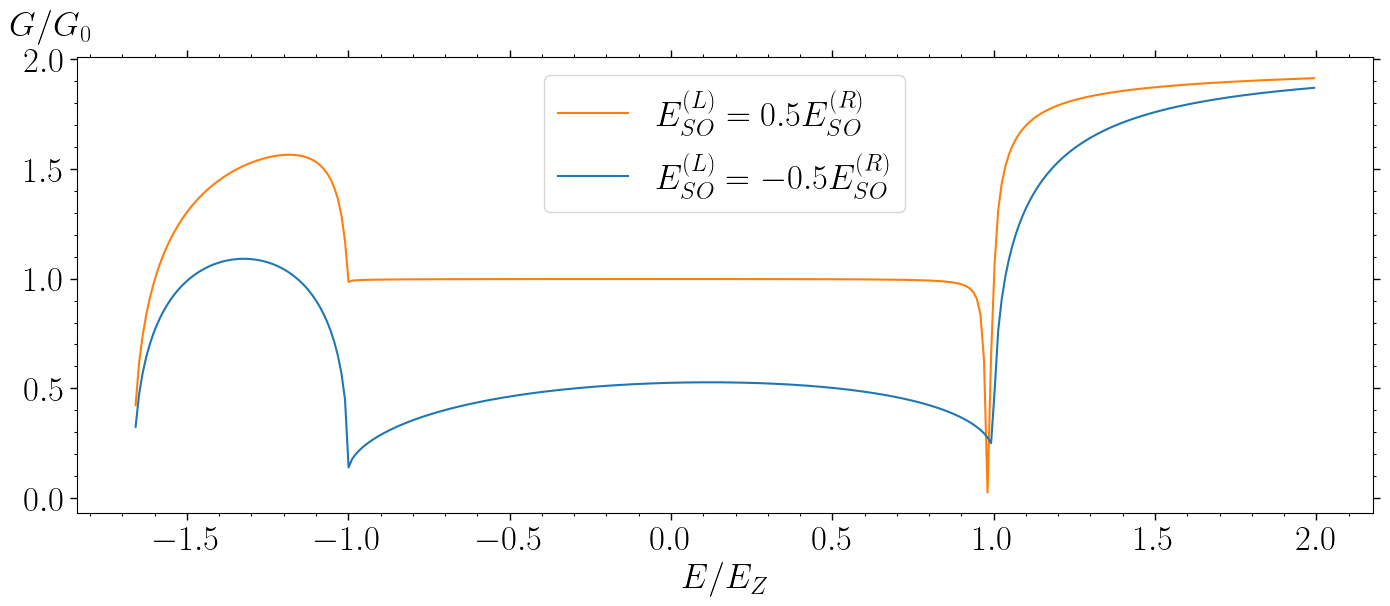

In [11]:
%matplotlib inline
# %matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(14, 6), dpi=100, tight_layout=True, facecolor='white')


color_dict = {0.5: "#ff7f0e", -0.5: "#1f77b4"}

k_list = list(trasmission_coeff_total.keys())
for k in k_list[0:2]:
    print(k[0], k[1])
#     if k[1] == 1:
#         axs.plot(en, trasmission_coeff_total[k][0],
#                    label=r"$$ E_{{SO}} = E_Z$$")
#     else:
    axs.plot(en, trasmission_coeff_total[k][0],
                   label=fr"$$ E_{{SO}}^{{(L)}} = {round(k[1]/alp_r, 4)}  E_{{SO}}^{{(R)}} $$",
                    color=color_dict[k[1]/alp_r])


axs.legend(fontsize = legend_font_size)
axs.set_xlabel(x_label, fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)
axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

# axs.text(0, 1.2, region_lbl[0]+r"\hspace{1cm}$k_{Z} d = 0.3$",
#             horizontalalignment='center', 
#             verticalalignment='center', 
#             transform=axs.transAxes, 
#             fontdict=font)
# plt.savefig(BASE_PATH+"2_T(E)_for_k=03kZ_E_(so,R)=3EZ.pdf", 
#             transparent = False, 
#             bbox_inches='tight')

plt.savefig(BASE_PATH_SLIDE+"2_T(E)_for_k=03kZ_E_(so,R)=3EZ.pdf", 
            transparent = False, 
            bbox_inches='tight')
plt.show()

1
1


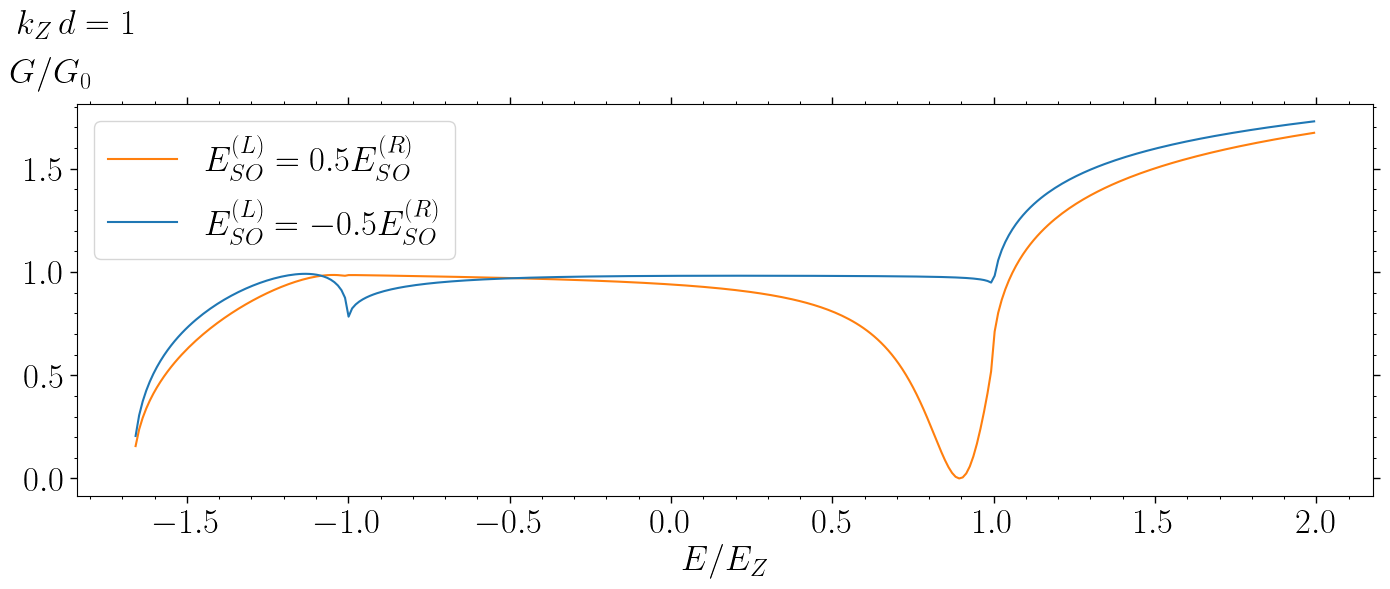

In [667]:
%matplotlib inline
# %matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(14, 6), dpi=100, tight_layout=True, facecolor='white')


k_list = list(trasmission_coeff_total.keys())
for k in k_list[2:4]:
    print(k[0])
#     if k[1] == 1:
#         axs.plot(en, trasmission_coeff_total[k][0],
#                    label=r"$$ E_{{SO}} = E_Z$$")
#     else:
    axs.plot(en, trasmission_coeff_total[k][0],
                   label=fr"$$ E_{{SO}}^{{(L)}} = {round(k[1]/alp_r, 4)}  E_{{SO}}^{{(R)}} $$",
                    color=color_dict[k[1]/alp_r])


axs.legend(fontsize = legend_font_size)
axs.set_xlabel(x_label, fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)
axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])
# axs.text(0, 1.2, region_lbl[1]+r"\hspace{1cm}$k_{Z} d = 1$",
#             horizontalalignment='center', 
#             verticalalignment='center', 
#             transform=axs.transAxes, 
#             fontdict=font)
# plt.savefig(BASE_PATH+"2_T(E)_for_k=kZ_E_(so,R)=3EZ.pdf", 
#             transparent = False, 
#             bbox_inches='tight')

plt.savefig(BASE_PATH_SLIDE+"2_T(E)_for_k=kZ_E_(so,R)=3EZ.pdf", 
            transparent = False, 
            bbox_inches='tight')
plt.show()

6
6


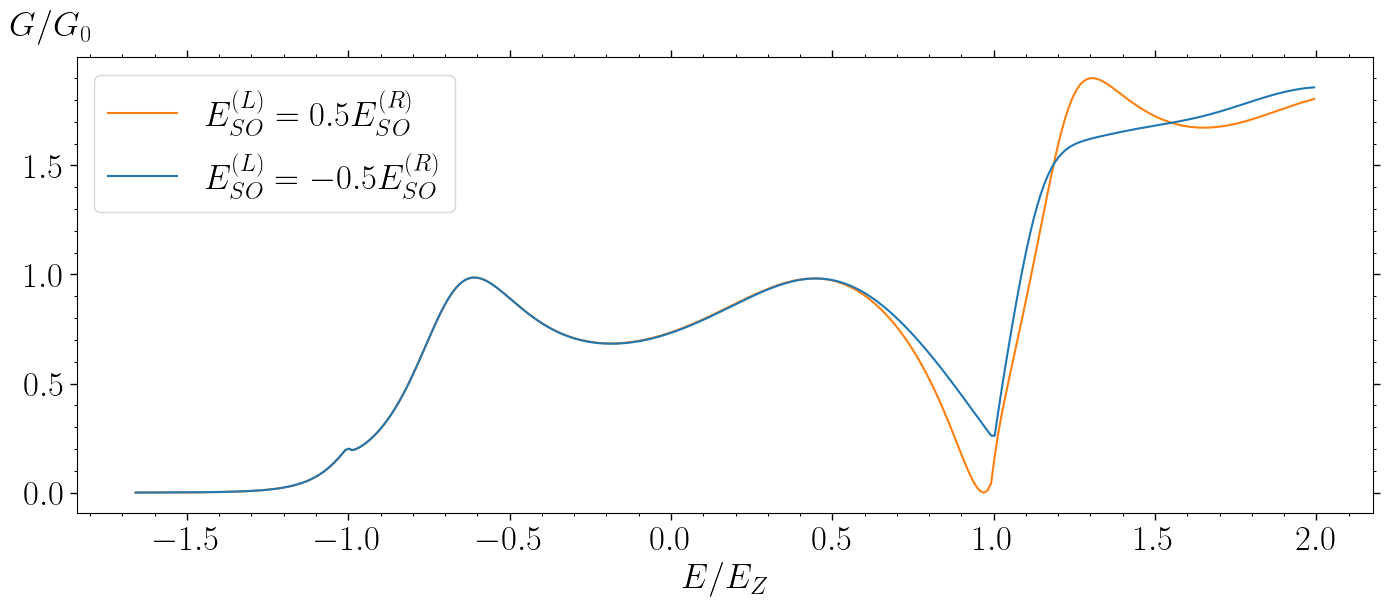

In [12]:
%matplotlib inline
# %matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(14, 6), dpi=100, tight_layout=True, facecolor='white')

# y_label = ["T", r"$$\frac{dT}{dE}$$"]
# font = {'family': "Times New Roman", "size": 25}
# y_label_pos = [(-.05, 1), (-.09, 1)]

k_list = list(trasmission_coeff_total.keys())
for k in k_list[4:]:
    print(k[0])
#     if k[1] == 1:
#         axs.plot(en, trasmission_coeff_total[k][0],
#                    label=r"$$ E_{{SO}} = E_Z$$")
#     else:
    axs.plot(en, trasmission_coeff_total[k][0],
                   label=fr"$$ E_{{SO}}^{{(L)}} = {round(k[1]/alp_r, 4)}  E_{{SO}}^{{(R)}} $$",
                    color=color_dict[k[1]/alp_r])

    
    
axs.legend(fontsize = legend_font_size)
axs.set_xlabel(x_label, fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)
axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])
# axs.text(0, 1.2, region_lbl[2]+r"\hspace{1cm}$k_{Z} d = 6$",
#             horizontalalignment='center', 
#             verticalalignment='center', 
#             transform=axs.transAxes, 
#             fontdict=font)
# plt.savefig(BASE_PATH+"2_T(E)_for_k=6kZ_E_(so,R)=3EZ.pdf", 
#             transparent = False, 
#             bbox_inches='tight')

plt.savefig(BASE_PATH_SLIDE+"2_T(E)_for_k=6kZ_E_(so,R)=3EZ.pdf", 
            transparent = False, 
            bbox_inches='tight')
plt.show()

# Dirac paradox

In [57]:
ev_to_j = 1.602176634e-19
#InSb
m = 0.015*cc.m_e

h_xy = 0.1e-3# eV

k_z = np.sqrt(2*m*h_xy*ev_to_j)/cc.hbar# 1/Metr
l_z = 1/k_z
print(f"k_z {k_z}") #1/Metr
print(f"l_z {l_z}m")
print(f"l_z {l_z*10**9:.2f}nm") #Metr


k_z 6274572.777578377
l_z 1.5937340046057163e-07m
l_z 159.37nm


In [58]:
L = 100e-9#m

E_l  = np.pi**2*cc.hbar**2/(2*m*L**2)/ev_to_j


print(E_l, E_l*1e3)

print(k_z * L)
print(np.pi*np.sqrt(h_xy/E_l), np.sqrt(h_xy/E_l))

0.0025068677507782506 2.5068677507782504
0.6274572777578377
0.6274572777578377 0.19972585466828846


In [9]:
k_so = np.sqrt(2 *m* 0.3e-3*ev_to_j)/cc.hbar
print(k_so)
print(1/k_so)
print(f"l_z {1/k_so*10**9:.2f}nm") #Metr

10867878.84655432
9.201427565757707e-08
l_z 92.01nm


##  Fig 4.5 $T vs E_{so}$

In [59]:
alp_r = 10
Eso_profile = [alp_r, 0, -alp_r]
# Eso_profile = [-alp_r, 0, alp_r]
x_profile = [-.31, .31]
junction = RashbaJunction2([x_profile, Eso_profile])


def g(ee, par):
#     print(par*1e3, ee/par, ee*1e3)
    junction[0] = ee/par
    junction[2] = -ee/par 
    junction.interface = [0, np.pi*np.sqrt(par/E_l)]
    
    S = junction.get_scattering_matrix(0)
    if not S.is_unitary:
        print(f"not unitary matrix length: {ee}, E_so: {par}, {ee/par}")
        return np.nan
    else:
        return S.t_coef
    
h_p = np.array([0.1, .05, .01, .005])*1e-3

eso = np.arange(0.001, 10, 0.0011)*1e-3

res = make_grid(eso, h_p, [g])

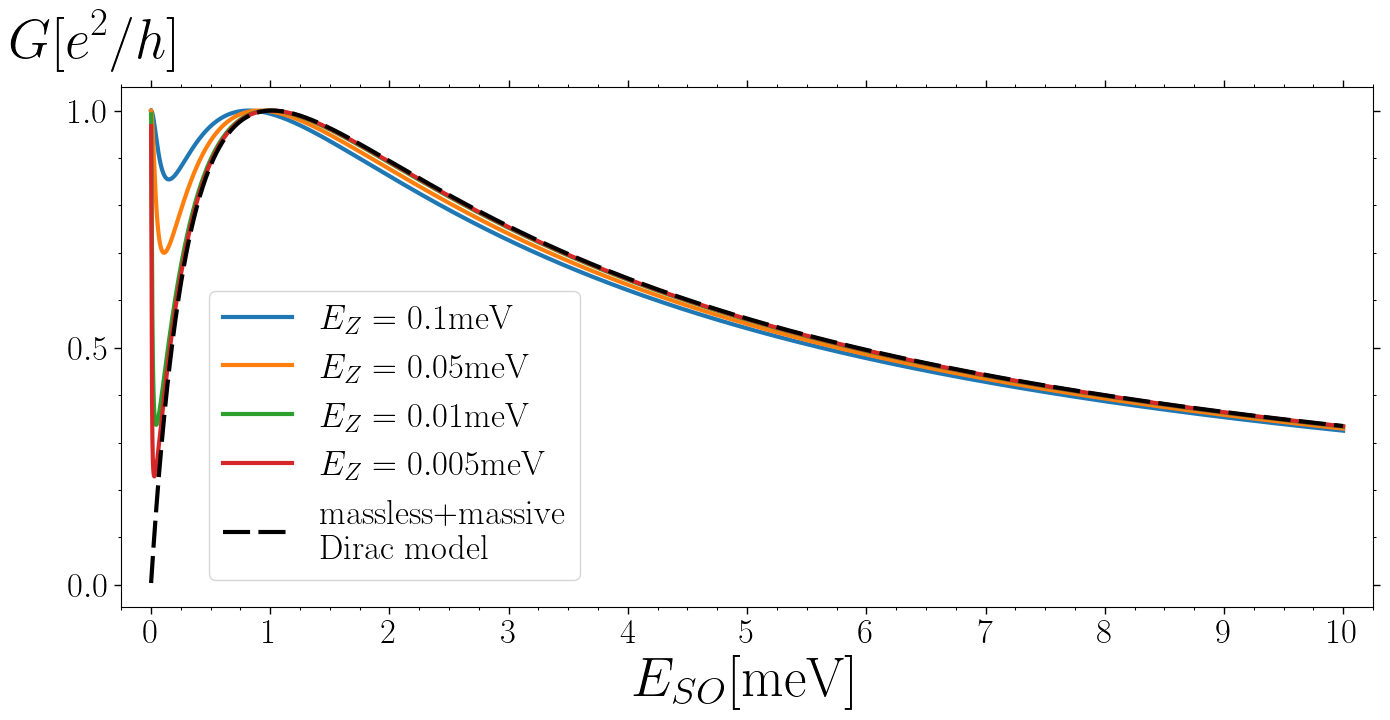

In [61]:
# %matplotlib notebook
%matplotlib inline

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Times New Roman'
color_cycle = plt.rcParams['axes.prop_cycle']()


fig, axs = plt.subplots(1, 1, figsize=(14, 7), dpi=100, tight_layout=True, facecolor='white')

exp_label = "massless+massive\nDirac model"

# ind, = np.where(np.isclose(0.5, eso*1e3, rtol = 1e-3))[0]

for j, k in enumerate(res.keys()):
    axs.plot(eso*1e3, res[k][0], label=fr"$E_Z = {k*1e3}$""meV", **next(color_cycle), linewidth=3)

    
axs.plot(eso*1e3, [expansion2(e) for e in eso], 
            label=exp_label, 
            dashes=[6.5, 2],
#             linestyle='dashed', 
            color = 'black', linewidth=3)



axs.set_xlabel(r"$E_{SO}$""[meV]", size = 40, fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, size = 40, fontdict=font)
axs.yaxis.set_label_coords(*y_label_pos[0])

# axs.text(-0.06, 1.15, region_lbl[0],
#             horizontalalignment='center', 
#             verticalalignment='center', 
#             transform=axs.transAxes, 
#             fontdict=font)



x_magior = np.array([1])
x_minor = np.array([0.25])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

from matplotlib import ticker
i = 0
anchor = (0.38, 0.33)
lines_labels = axs.get_legend_handles_labels()
leg = axs.legend(*lines_labels, 
                        loc=7, 
                        bbox_to_anchor=anchor, 
                        prop={'family': 'Times New Roman', 'size': legend_font_size})
# t1, t2, t3 = leg.get_texts()
t1 = leg.get_texts()
# here we create the distinct instance
t1[-1]._fontproperties = t1[0]._fontproperties.copy()
t1[-1].set_size(legend_font_size)

    
axs.set_xlim(-0.25, 10.25)

plt.savefig(BASE_PATH_SLIDE+"T_vs_E_so(expansion)a.pdf", 
            transparent = False, 
            bbox_inches='tight')
plt.show()


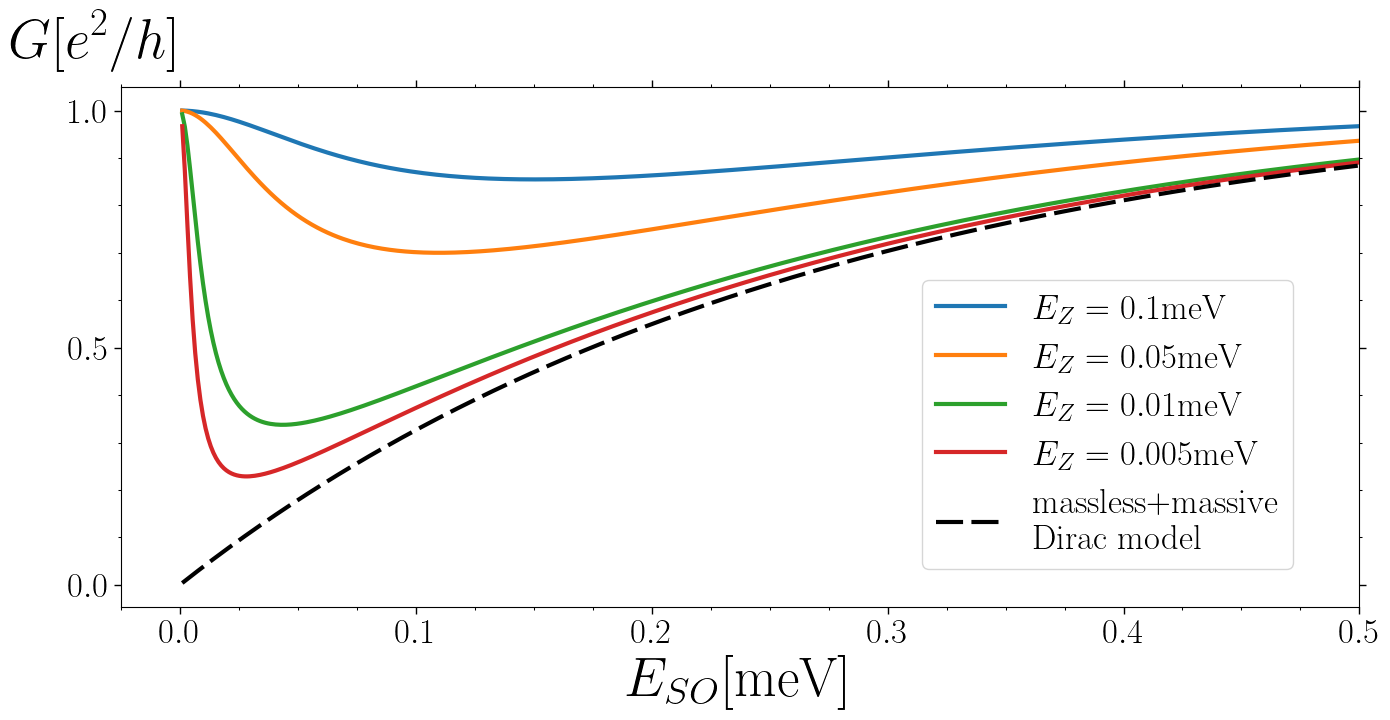

In [69]:
# %matplotlib notebook
%matplotlib inline

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Times New Roman'
color_cycle = plt.rcParams['axes.prop_cycle']()


fig, axs = plt.subplots(1, 1, figsize=(14, 7), dpi=100, tight_layout=True, facecolor='white')

exp_label = "massless+massive\nDirac model"

ind, = np.where(np.isclose(0.5, eso*1e3, rtol = 1e-3))[0]
for j, k in enumerate(res.keys()):
    axs.plot((eso*1e3)[:ind], res[k][0][:ind], label=fr"$E_Z = {k*1e3}$""meV", linewidth=3)

axs.plot((eso*1e3)[:ind], [expansion2(e) for e in eso[:ind]], 
            label=exp_label, 
#             linestyle='dashed',
            dashes=[6.5, 2],
            color = 'black', linewidth=3)




axs.set_xlabel(r"$E_{SO}$""[meV]", size = 40, fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, size = 40, fontdict=font)
axs.yaxis.set_label_coords(*y_label_pos[0])

# axs.text(-0.06, 1.15, region_lbl[1],
#             horizontalalignment='center', 
#             verticalalignment='center', 
#             transform=axs.transAxes, 
#             fontdict=font)



x_magior = np.array([0.1])
x_minor = np.array([0.025])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

from matplotlib import ticker
i = 0
anchor = (0.96, 0.35)
lines_labels = axs.get_legend_handles_labels()
leg = axs.legend(*lines_labels, 
                        loc=7, 
                        bbox_to_anchor=anchor, 
                        prop={'family': 'Times New Roman', 'size': legend_font_size})
# t1, t2, t3 = leg.get_texts()
t1 = leg.get_texts()
# here we create the distinct instance
t1[-1]._fontproperties = t1[0]._fontproperties.copy()
t1[-1].set_size(legend_font_size)

    
axs.set_xlim(-0.025, 0.5)

# plt.savefig(BASE_PATH_DIRAC_PARADOX+"T_vs_E_so(expansion)b.pdf", 
#             transparent = False, 
#             bbox_inches='tight')
plt.savefig(BASE_PATH_SLIDE+"T_vs_E_so(expansion)b.pdf", 
            transparent = True, 
            bbox_inches='tight')
plt.show()

## Fig 4.4 $T vs k_{SO} d$

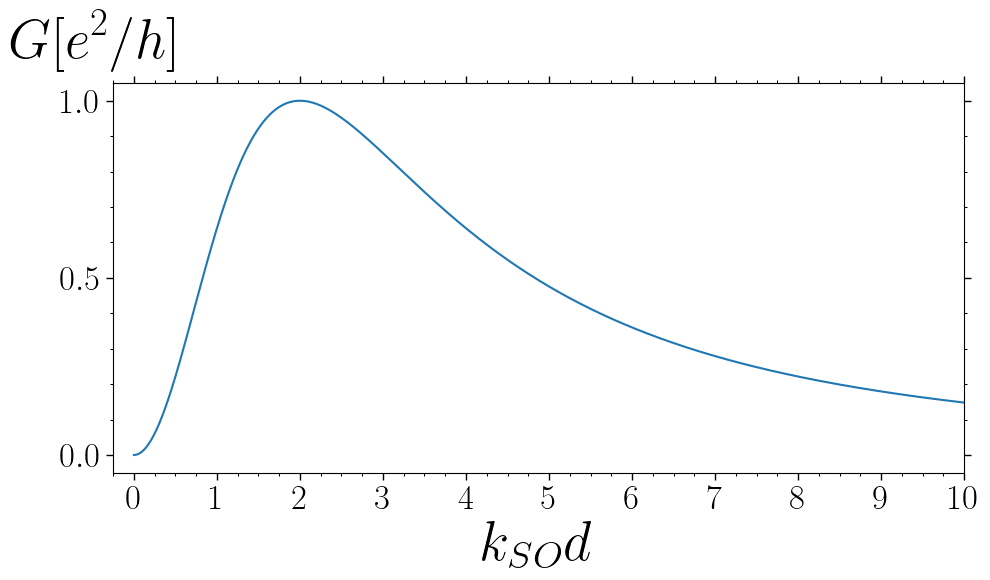

In [70]:
# %matplotlib notebook
%matplotlib inline

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Times New Roman'

# (14, 7)
fig, axs = plt.subplots(1, 1, figsize=(10, 5.6), dpi=100, tight_layout=True, linewidth=3, facecolor='white')


axs.plot(np.arange(0, 10, 0.01), [expansion(e) for e in np.arange(0, 10, 0.01)])#, linestyle='dashedl')


x_magior = np.array([1])
x_minor = np.array([0.25])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])


axs.set_xlabel(r"$k_{SO} d$", size = 40, fontdict=font)
axs.set_ylabel(y_label[0], rotation=0,size = 40, fontdict=font)
# axs.set_ylabel(r"$T_0$", rotation=0, fontdict=font)
axs.yaxis.set_label_coords(*y_label_pos[0])
    
axs.set_xlim(-0.25, 10)

plt.savefig(BASE_PATH_SLIDE+"transmission_coefficient.pdf", 
            transparent = True, 
            bbox_inches='tight')
plt.show()